# Convolutional Neural Network

# Dataset
### We won't use the famous dataset: __[MNIST](http://yann.lecun.com/exdb/mnist/)__ for the following reasons:
- **MNIST is too easy.** Some CNNs already acheived 99.7% accuracy on MNIST.
- **MNIST is overused.** __[In April 2017 Twitter thread](https://twitter.com/goodfellow_ian/status/852591106655043584)__, Google Brain research scientist and deep learning expert **Ian Goodfellow** calls for people to move away from MNIST.
<img src="images/FMNIST_Goodfellow.png" alt="Tensors" title="Tensors" width="350"/>


- **MNIST can not represent modern CV tasks**, as noted in __[another April 2017 Twitter thread](https://twitter.com/fchollet/status/852594987527045120)__, deep learning expert/Keras author François Chollet.
<img src="images/FMNIST_CV.png" alt="Tensors" title="Tensors" width="350"/>


### Instead, we will be using __[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)__ :
As the name indicates, it is a dataset of fashion images (T-shirt, coat, sandal ... etc), instead of hand-written images. It is consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes:

0 : T-shirt/top <BR>
1 : Trouser <BR>
2 : Pullover <BR>
3 : Dress <BR>
4 : Coat <BR>
5 : Sandal <BR>
6 : Shirt <BR>
7 : Sneaker <BR>
8 : Bag <BR>
9 : Ankle boot <BR>

<img src="images/FMNIST.png" alt="FMNIST" title="FMNIST" width="850"/>

# Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#from tensorflow.keras.datasets import fashion_mnist
from tensorflow.examples.tutorials.mnist import input_data # import MNIST | FMNIST data
from tqdm import tqdm

print(tf.__version__)

c:\users\oae15\desktop\ml\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.
1.7.0


# Load FMNIST dataset
data is already splitted as trainig & test...

In [2]:
fmnist = input_data.read_data_sets("tmp/data/FMNIST/", one_hot=True) #, one_hot=True
X_train = fmnist.train.images.reshape((-1,28,28,1))
y_train = fmnist.train.labels
X_test = fmnist.test.images.reshape((-1,28,28,1))
y_test = fmnist.test.labels
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data/FMNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting tmp/data/FMNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting tmp/data/FMNIST/t10k-images-idx3-ubyte.gz
Extracting tmp/data/FMNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 28, 28, 1) (55000, 10)
(10000, 28, 28, 1) (10000, 10)


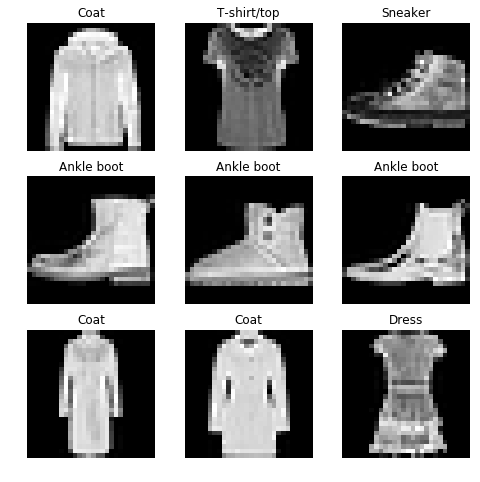

In [7]:
fig = plt.figure(figsize = (8,8))
for i in range (9):
    ax = plt.subplot("33"+str(i+1))
    ax.set_title(labels[np.argmax(y_train[i])])
    ax.imshow(X_train[i,:,:,0], cmap='gray')
    ax.axis('off')
plt.show()

# Define the Model:
<img src="images/CNN_FMNIST.png" alt="CNN_FMNIST" title="CNN_FMNIST" height="580" width="890"/>
<center>Green: conv -- Yellow: max-pool -- pink: fully connected</center>
<center>__[ConvNetDraw](https://cbovar.github.io/ConvNetDraw/)__</center> <br>
Each Convolurtion layer will be consisted of the following:
1. conv2d: 2D convolution layer.parameters:
    - inputs: Tensor input.
    - filters: the number of filters in the convolution.
    - kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
    - strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width.
    - padding: One of **valid** or **same** (case-insensitive):
        - valid: no padding. some values might be dropped.
        - same: pad with zeroes so the output tensor will have the same width and height values as the input tensor.
2. maxpooling: parameters:
    - inputs: The tensor over which to pool. Must have rank 4.
    - pool_size: An integer or tuple/list of 2 integers: (pool_height, pool_width) specifying the size of the pooling window.
    - strides: An integer or tuple/list of 2 integers, specifying the strides of the pooling operation.
    - padding.
    
3. ReLU

In [44]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1), name='input')
y = tf.placeholder(tf.float32, shape=(None, 10))

with tf.name_scope('Convolution_1'):
    conv1 = tf.layers.conv2d(inputs=X, filters=10, kernel_size=(3,3), padding='valid', name='conv1') # 26x26
    maxpool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=(2,2), strides=2, padding='same', name='maxpooling1') # 13x13
    #batch_norm = tf.layers.batch_normalization()
    #layer1 = tf.nn.relu(maxpool1, name='ReLU1')
    layer1 = tf.nn.leaky_relu(maxpool1, alpha=0.1, name='ReLU1')

with tf.name_scope('Convolution_2'):
    conv2 = tf.layers.conv2d(inputs=layer1, filters=30, kernel_size=(3,3), padding='valid', name='conv2') # 11x11
    maxpool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=(2,2), strides=2, padding='same', name='maxpooling2') # 6x6
    #batch_norm = tf.layers.batch_normalization()
    #layer2 = tf.nn.relu(maxpool2, name='ReLU2')
    layer2 = tf.nn.leaky_relu(maxpool2, alpha=0.1, name='ReLU2')

with tf.name_scope('Convolution_3'):
    conv3 = tf.layers.conv2d(inputs=layer2, filters=50, kernel_size=(3,3), padding='valid', name='conv3') # 4x4
    maxpool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=(2,2), strides=2, padding='same', name='maxpooling3') # 2x2
    #batch_norm = tf.layers.batch_normalization()
    #layer3 = tf.nn.relu(maxpool3, name='ReLU3')
    layer3 = tf.nn.leaky_relu(maxpool3, alpha=0.1, name='ReLU3')

flat = tf.layers.flatten(layer3, name='Flatten') # 2*2*50=200

fully_connected1 = tf.layers.dense(flat, units=256, name='Fully_connected1')

logits = tf.layers.dense(inputs=fully_connected1, units=10, name='output_layer')

Next, we compute cross-entropy of one hot encoded labels and the softmax of the predictions from our logits layer. **tf.losses.softmax_cross_entropy()** takes one hot encoded labels and logits as arguments, performs softmax activation on logits, calculates cross-entropy, and returns our loss as a scalar Tensor:

In [45]:
loss = tf.losses.softmax_cross_entropy(onehot_labels=tf.cast(y, tf.int32), logits=logits)

configure our model to optimize this loss value during training.

In [46]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

calculate accuracy

In [47]:
correct_predictoins = tf.equal(tf.argmax(y,1), tf.argmax(logits,1))
accuracy = tf.reduce_mean(tf.cast(correct_predictoins, tf.float32))

# Training

In [48]:
# with RelU: epoch: 15  -- training accuracy: 0.9342545  -- test accuracy: 0.8986
# with LeakyRelU: epoch: 15  -- training accuracy: 0.935  -- test accuracy: 0.9034

epochs = 15
batch_size = 128
samples_number = X_train.shape[0]

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

accuracy_train, accuracy_test = [], []

with tf.Session() as sess:
    sess.run(init)
    batches_number = int(samples_number / batch_size)
    for epoch in np.arange(epochs):
        
        for one_batch in tqdm(np.arange(batches_number)):
            batch_x, batch_y = fmnist.train.next_batch(batch_size, shuffle=True)
            _ = sess.run(optimizer, feed_dict={X:batch_x.reshape((-1,28,28,1)), y:batch_y})
        
        acc_train = sess.run(accuracy, feed_dict={X:X_train, y:y_train})
        acc_test, y_pred = sess.run([accuracy, logits], feed_dict={X:X_test, y:y_test})
        accuracy_train.append(acc_train)
        accuracy_test.append(acc_test)
        
        print('epoch:', int(epoch+1), ' -- training accuracy:', acc_train, ' -- test accuracy:', acc_test)

print("\nTraining complete!  :)")

100%|██████████████████████████████████████████████████████████████| 429/429 [00:26<00:00, 15.99it/s]


epoch: 1  -- training accuracy: 0.8473091  -- test accuracy: 0.8414


100%|██████████████████████████████████████████████████████████████| 429/429 [00:27<00:00, 15.73it/s]


epoch: 2  -- training accuracy: 0.87430906  -- test accuracy: 0.8677


100%|██████████████████████████████████████████████████████████████| 429/429 [00:26<00:00, 16.29it/s]


epoch: 3  -- training accuracy: 0.8773636  -- test accuracy: 0.8631


100%|██████████████████████████████████████████████████████████████| 429/429 [00:26<00:00, 16.06it/s]


epoch: 4  -- training accuracy: 0.89976364  -- test accuracy: 0.8852


100%|██████████████████████████████████████████████████████████████| 429/429 [00:26<00:00, 16.09it/s]


epoch: 5  -- training accuracy: 0.90672725  -- test accuracy: 0.8909


100%|██████████████████████████████████████████████████████████████| 429/429 [00:26<00:00, 15.92it/s]


epoch: 6  -- training accuracy: 0.90736365  -- test accuracy: 0.8907


100%|██████████████████████████████████████████████████████████████| 429/429 [00:26<00:00, 16.04it/s]


epoch: 7  -- training accuracy: 0.90976363  -- test accuracy: 0.8891


100%|██████████████████████████████████████████████████████████████| 429/429 [00:27<00:00, 15.69it/s]


epoch: 8  -- training accuracy: 0.91874546  -- test accuracy: 0.9018


100%|██████████████████████████████████████████████████████████████| 429/429 [00:27<00:00, 15.61it/s]


epoch: 9  -- training accuracy: 0.91998184  -- test accuracy: 0.8975


100%|██████████████████████████████████████████████████████████████| 429/429 [00:26<00:00, 16.00it/s]


epoch: 10  -- training accuracy: 0.92678183  -- test accuracy: 0.9004


100%|██████████████████████████████████████████████████████████████| 429/429 [00:27<00:00, 15.51it/s]


epoch: 11  -- training accuracy: 0.9273273  -- test accuracy: 0.8988


100%|██████████████████████████████████████████████████████████████| 429/429 [00:26<00:00, 16.17it/s]


epoch: 12  -- training accuracy: 0.9344182  -- test accuracy: 0.9038


100%|██████████████████████████████████████████████████████████████| 429/429 [00:26<00:00, 16.34it/s]


epoch: 13  -- training accuracy: 0.9367091  -- test accuracy: 0.901


100%|██████████████████████████████████████████████████████████████| 429/429 [00:26<00:00, 16.29it/s]


epoch: 14  -- training accuracy: 0.9332  -- test accuracy: 0.8989


100%|██████████████████████████████████████████████████████████████| 429/429 [00:26<00:00, 16.12it/s]


epoch: 15  -- training accuracy: 0.935  -- test accuracy: 0.9034

Training complete!  :)


## Plot accuracies

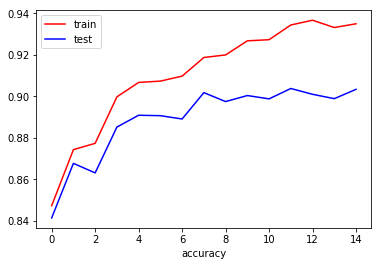

In [50]:
plt.plot(np.arange(epochs), accuracy_train, 'r', label='train')
plt.plot(np.arange(epochs), accuracy_test, 'b', label='test')
plt.xlabel('epochs')
plt.xlabel('accuracy')
plt.legend(loc='upper left')
plt.show()

## Plot predictions

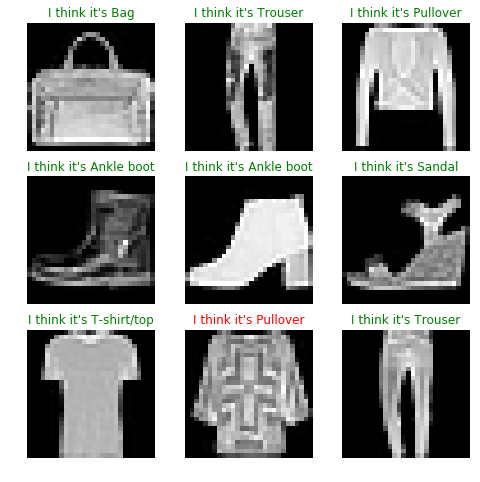

In [99]:
fig = plt.figure(figsize = (8,8))
for i in range (9):
    index = np.random.randint(low=0, high=X_test.shape[0], size=1)[0]
    color = 'g' if np.argmax(y_test[index])==np.argmax(y_pred[index]) else 'r'
    ax = plt.subplot("33"+str(i+1))
    ax.set_title('I think it\'s ' + labels[np.argmax(y_test[index])], color=color)
    ax.imshow(X_test[index,:,:,0], cmap='gray')
    ax.axis('off')
plt.show()